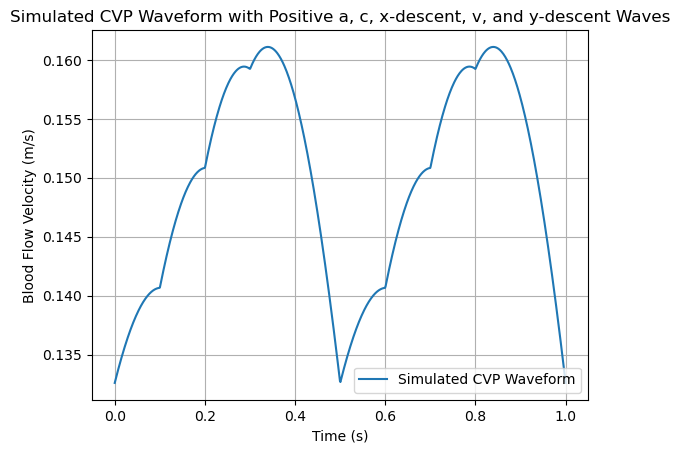

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T_heart = 1.0  # Heartbeat period (seconds)
u_avg = 0.1   # mean venous velocity 

# Define amplitudes for CVP wave components
# Five 
A_a = 0.02    # Amplitude for a-wave 
A_c = 0.015   # Amplitude for c-wave 
A_x = 0.01    # Amplitude for x-descent 
A_v = 0.018   # Amplitude for v-wave 
A_y = 0.015   # Amplitude for y-descent 

# Define the CVP waveform function with the five components

def cvp_waveform(t, T_heart):
    
    a_wave = A_a * np.abs(np.sin(2 * np.pi * t / T_heart))

    
    c_wave = A_c * np.abs(np.sin(2 * np.pi * (t - 0.1 * T_heart) / T_heart))

    
    x_descent = A_x * np.abs(np.sin(2 * np.pi * (t - 0.3 * T_heart) / T_heart))

    
    v_wave = A_v * np.abs(np.sin(2 * np.pi * (t - 0.5 * T_heart) / T_heart))

    
    y_descent = A_y * np.abs(np.sin(2 * np.pi * (t - 0.7 * T_heart) / T_heart))

    
    return a_wave + c_wave + x_descent + v_wave + y_descent + u_avg

# Time range
t = np.linspace(0, T_heart, 1000)

# Compute the CVP waveform
cvp_t = cvp_waveform(t, T_heart)

# Plot the CVP waveform
plt.plot(t, cvp_t, label="Simulated CVP Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Blood Flow Velocity (m/s)")
plt.title("Simulated CVP Waveform with Positive a, c, x-descent, v, and y-descent Waves")
plt.legend()
plt.grid()
plt.show()

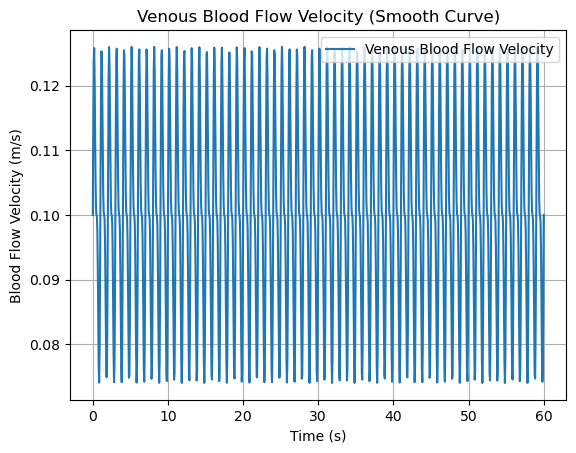

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
T_heart = 1.0  # Heartbeat period (seconds)
u_avg = 0.1   # Mean venous velocity (m/s)
A = [0.02, 0.01]  # Smaller amplitude 
phi = [0, 0]  # Keep the phase consistent to make the fluctuation smoother
N = len(A)  # Number of harmonics

#  Define venous blood flow velocity function
def venous_blood_flow_velocity(t, u_avg, T_heart, A, phi):
    u_t = u_avg
    for n in range(N):
        u_t += A[n] * np.sin(2 * np.pi * (n + 1) * t / T_heart + phi[n])
    return u_t

# time
t = np.linspace(0, T_heart*60, 1000)


u_t = venous_blood_flow_velocity(t, u_avg, T_heart, A, phi)


plt.plot(t, u_t, label="Venous Blood Flow Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Blood Flow Velocity (m/s)")
plt.title("Venous Blood Flow Velocity (Smooth Curve)")
plt.legend()
plt.grid()
plt.show()